In [1]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, ma|tplotlib >= 2.0
"""

import sys
import os
import numpy   as np

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import cantera as ct

from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

In [2]:
##########################################################################################
### Input Data

OutputDir          = WORKSPACE_PATH + '/ROMNet/Data_100DReact/'
FigDir             = OutputDir + '/fig/'

MixtureFile        = 'gri30.yaml'
NTs                = 10
T0Vec              = np.logspace(np.log10(300), np.log10(3000), NTs) # [2.e-5]
T0                 = 1700.0
NPerT0             = 2000
tMinVec            = [5.e-3, 5.e-7]

tStratch           = 1.
Nt                 = NPerT0*2

P0Inlet            = ct.one_atm
EqRatioInlet       = 1.

rtol               = 1.e-10
SOLVER             = 'BDF'#'RK23'#'BDF'#'Radau'
##########################################################################################

In [3]:
def IdealGasConstPressureReactor_SciPY(t, y):
    print(t)

    YEnd     = np.array([1.-np.sum(y[1:])], dtype=np.float64)
    Y        = np.concatenate((y[1:], YEnd), axis=0)
    gas_.TPY = y[0], P_, Y
    
    wdot     = gas_.net_production_rates

    ydot     = np.zeros_like(y, dtype=np.float64)
    ydot[0]  = - np.dot(wdot, gas_.partial_molar_enthalpies) / gas_.cp / gas_.density
    ydot[1:] = wdot[0:-1] * gas_.molecular_weights[0:-1] / gas_.density
    
    return ydot


def IdealGasReactor_SciPY(t, y):
    print(t)

    YEnd     = np.array([1.-np.sum(y[1:])], dtype=np.float64)
    Y        = np.concatenate((y[1:], YEnd), axis=0)
    gas_.TDY = y[0], density_, Y
    
    wdot     = gas_.net_production_rates

    ydot     = np.zeros_like(y, dtype=np.float64)
    ydot[0]  = - np.dot(wdot, gas_.partial_molar_int_energies) / gas_.cv / density_
    ydot[1:] = wdot[0:-1] * gas_.molecular_weights[0:-1] / density_
    
    return ydot

In [4]:
gas     = ct.Solution('gri30.yaml')
gas.TP  = T0, ct.one_atm
gas.set_equivalence_ratio(2., 'H2:1.0', 'O2:1.0, N2:4.0')

In [5]:
#T0      = 1400
#gas.TPX = T0, 10.*ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'
r       = ct.IdealGasConstPressureReactor(gas)
sim     = ct.ReactorNet([r])

gas_    = gas
mass_   = r.mass
density_= r.density
P_      = gas_.P

y0      = np.array(np.hstack((gas_.T, gas_.Y[0:-1])), dtype=np.float64)

In [6]:
############################################################################
# ### Initialize Integration 
# tAuto    = 10**( (8.75058755*(1000/T0) -9.16120796) )
# tMin     = tAuto * 1.e-1
# tMax     = tAuto * 1.e1
# dt0      = tAuto * 1.e-3

# tStratch = 1.01
# tVec     = [0.0]
# t        = tMin
# dt       = dt0
# while (t <= tMax):
#     tVec.append(t)
#     t  =   t + dt
#     dt = dt0 * tStratch
############################################################################

############################################################################
TVec  = np.array([700, 800, 900, 1000, 1200, 1500, 1700])
tVec1 = np.array([5.e2, 5.e0, 1.e-1, 1.e-4, 1.e-5, 5.e-6, 1.e-6])
tVec2 = np.array([5.e1, 1.e0, 1.e-2, 1.e-5, 1.e-6, 5.e-7, 1.e-7])
tVec3 = np.array([1.e3, 5.e1, 5.e-1, 5.e-3, 5.e-3, 5.e-3, 5.e-2])

f1 = interp1d(1000/TVec, np.log10(tVec1), kind='cubic')
f2 = interp1d(1000/TVec, np.log10(tVec2), kind='cubic')
f3 = interp1d(1000/TVec, np.log10(tVec3), kind='cubic')

tMin     = f1(1000/T0) #1.e-5
dt0      = f2(1000/T0) #1.e-5
tMax     = f3(1000/T0) #1.e-3

tStratch = 1.3
# tVec     = [0.0]
# t        = 10**tMin
# dt       = 10**dt0
# while (t <= 10**tMax):
#     tVec.append(t)
#     t  =   t + dt
#     dt = dt0 * tStratch
tVec     = np.concatenate([[0.], np.logspace(tMin, tMax, 3000)])
#############################################################################

In [8]:
states     = ct.SolutionArray(gas, 1, extra={'t': [0.0]})
output     = solve_ivp( IdealGasConstPressureReactor_SciPY, (tVec[0],tVec[-1]), y0, method=SOLVER, t_eval=tVec, rtol=rtol )

0.0
0.0009430423562457638
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.8432416527305082e-09
1.8432416527305082e-09
3.6864833054610163e-09
3.6864833054610163e-09
2.21188998327661e-08
2.21188998327661e-08
4.0551316360071176e-08
4.0551316360071176e-08
1.448722274874462e-07
1.448722274874462e-07
2.4919313861482127e-07
2.4919313861482127e-07
3.5351404974219633e-07
3.5351404974219633e-07
5.264009836083779e-07
5.264009836083779e-07
6.992879174745596e-07
6.992879174745596e-07
8.721748513407412e-07
8.721748513407412e-07
1.0450617852069227e-06
1.0450617852069227e-06
1.257096735785094e-06
1.257096735785094e-06
1.257096735785094e-06
1.4691316863632653e-06
1.4691316863632653e-06
1.4691316863632653e-06
1.6811666369414367e-06
1.6811666369414367e-06
1.6811666369414367e-06
1.893201587519608e-06
1.893201587519

5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.541423821447426e-06
5.51483994

5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.964039009478708e-06
5.96403900

6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.2049893199315006e-06
6.204989319

6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.560569433376379e-06
6.56056943

6.617892449096204e-06
6.600243737359801e-06
6.600243737359801e-06
6.600243737359801e-06
6.617892449096204e-06
6.617892449096204e-06
6.617892449096204e-06
6.617892449096204e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.635541160832608e-06
6.63554116

7.190792803413618e-06
7.190792803413618e-06
7.192610299633455e-06
7.192610299633455e-06
7.194427795853292e-06
7.194427795853292e-06
7.196245292073129e-06
7.196245292073129e-06
7.198062788292966e-06
7.198062788292966e-06
7.1998802845128026e-06
7.1998802845128026e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-06
7.2180552467111715e-0

7.505182095422452e-06
7.505182095422452e-06
7.4746424663046355e-06
7.4746424663046355e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.451737744466273e-06
7.451737744466273e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372651745727e-06
7.459372

7.582187045556388e-06
7.582187045556388e-06
7.579159985991736e-06
7.579159985991736e-06
7.5821870455563875e-06
7.5821870455563875e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214105121039e-06
7.585214

7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.88621182551951e-06
7.863693919101832e-06
7.863693919101832e-06
7.852434965892994e-06
7.852434965892994e-06
7.852434965892994e-06
7.863693919101832e-06
7.863693919101832e-06
7.863693919101832e-06
7.863693919101832e-06
7.863693919101832e-06
7.863693919101832e-06
7.863693919101832e-06
7.863693919101832e-06


7.94911522999337e-06
7.94911522999337e-06
7.950365392024031e-06
7.950365392024031e-06
7.951615554054693e-06
7.951615554054693e-06
7.952865716085354e-06
7.952865716085354e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.965367336391969e-06
7.9653673363

8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.284802330277453e-06
8.275946725990383e-06
8.275946725990383e-06
8.271518923846848e-06
8.271518923846848e-06
8.275946725990385e-06
8.275946725990385e-06
8.280374528133921e-06
8.280374528133921e-06
8.284802330277458e-06
8.284802330277458e-06
8.289230132420995e-06
8.289230132420995e-06
8.293657934564531e-06
8.29365793

8.679984743057493e-06
8.679984743057493e-06
8.679984743057493e-06
8.679984743057493e-06
8.679984743057493e-06
8.679984743057493e-06
8.679984743057493e-06
8.679984743057493e-06
8.679984743057493e-06
8.679984743057493e-06
8.679984743057493e-06
8.65325301863159e-06
8.65325301863159e-06
8.65325301863159e-06
8.63988715641864e-06
8.63988715641864e-06
8.63988715641864e-06
8.633204225312165e-06
8.633204225312165e-06
8.633204225312165e-06
8.629862759758927e-06
8.629862759758927e-06
8.628192026982307e-06
8.628192026982307e-06
8.628192026982307e-06
8.629862759758926e-06
8.629862759758926e-06
8.629862759758926e-06
8.631533492535544e-06
8.631533492535544e-06
8.631533492535544e-06
8.633204225312163e-06
8.633204225312163e-06
8.633204225312163e-06
8.634874958088782e-06
8.634874958088782e-06
8.6365456908654e-06
8.6365456908654e-06
8.647191592027849e-06
8.647191592027849e-06
8.657837493190297e-06
8.657837493190297e-06
8.657837493190297e-06
8.657837493190297e-06
8.657837493190297e-06
8.657837493190297e-0

8.89248187528553e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000564e-06
8.91202919000

9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.086234935227535e-06
9.08623493

9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.253380752928223e-06
9.247630561304433e-06
9.247630561304433e-06
9.253380752928221e-06
9.253380752928221e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.25913094455201e-06
9.2591309

9.592879782869907e-06
9.592879782869907e-06
9.592879782869907e-06
9.591228446305274e-06
9.591228446305274e-06
9.592879782869907e-06
9.592879782869907e-06
9.59453111943454e-06
9.59453111943454e-06
9.596182455999173e-06
9.596182455999173e-06
9.597833792563806e-06
9.597833792563806e-06
9.599485129128439e-06
9.599485129128439e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.615998494774769e-06
9.6159984947

9.758280366629354e-06
9.758280366629354e-06
9.760885347345417e-06
9.760885347345417e-06
9.76349032806148e-06
9.76349032806148e-06
9.789540135222106e-06
9.789540135222106e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.815589942382733e-06
9.8155899423

1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0250462502419602e-05
1.0203136212948053e-05
1.0203136212948053e-05
1.0179473068212277e-05
1.0179473068212277e-05
1.016764149584439e-05
1.0167641495

1.042643311660093e-05
1.042643311660093e-05
1.0402288329566345e-05
1.0402288329566345e-05
1.0390215936049051e-05
1.0390215936049051e-05
1.0384179739290404e-05
1.0384179739290404e-05
1.0390215936049051e-05
1.0390215936049051e-05
1.0396252132807698e-05
1.0396252132807698e-05
1.0402288329566345e-05
1.0402288329566345e-05
1.0408324526324991e-05
1.0408324526324991e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.0462876525109985e-05
1.04628765251

1.0685780170480618e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.06975376490092e-05
1.069753764

1.1017486433754048e-05
1.1017486433754048e-05
1.1013154823786772e-05
1.1013154823786772e-05
1.1010989018803135e-05
1.1010989018803135e-05
1.1013154823786774e-05
1.1013154823786774e-05
1.1015320628770413e-05
1.1015320628770413e-05
1.1017486433754052e-05
1.1017486433754052e-05
1.101965223873769e-05
1.101965223873769e-05
1.1041310288574079e-05
1.1041310288574079e-05
1.1041310288574079e-05
1.1041310288574079e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.1062968338410467e-05
1.10629683384

1.1608679500468985e-05
1.1611075149011293e-05
1.1611075149011293e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134707975536e-05
1.16134

1.189303806173913e-05
1.189303806173913e-05
1.189303806173913e-05
1.189303806173913e-05
1.189303806173913e-05
1.189303806173913e-05
1.189303806173913e-05
1.189303806173913e-05
1.1885599327582614e-05
1.1885599327582614e-05
1.1881879960504355e-05
1.1881879960504355e-05
1.1881879960504355e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e-05
1.1885599327582612e

1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2264096335699619e-05
1.2253330723904452e-05
1.2253330723904452e-05
1.2247947918006868e-05
1.2247947918006868e-05
1.2245256515058078e-05
1.2245256515058078e-05
1.224794791800687e-05
1.224794791800687e-05
1.2250639320955662e-05
1.2250639320955662e-05
1.2253330723904454e-05
1.2253330723904454e-05
1.2256022126853246e-05
1.2256022126853246e-05
1.2282936156341166e-05
1.2282936156341166e-05
1.2309850185829087e-05
1.2309850185829087e-05
1.2336764215317007e-05
1.2336764215317007e-05
1.23636782448

1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.2685807460236686e-05
1.268580746

1.2834163271392841e-05
1.2834163271392841e-05
1.2834163271392841e-05
1.2826052212400872e-05
1.2826052212400872e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283416327139284e-05
1.283

1.3139832614728171e-05
1.3139832614728171e-05
1.3139832614728171e-05
1.3139832614728171e-05
1.3139832614728171e-05
1.3139832614728171e-05
1.3139832614728171e-05
1.3114823004206379e-05
1.3114823004206379e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3096065796315034e-05
1.3096065796315034e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.3102318198945482e-05
1.310231819

1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.3498746988013915e-05
1.349874698

1.3835323632265239e-05
1.3835323632265239e-05
1.383739423005728e-05
1.383739423005728e-05
1.3858100207977694e-05
1.3858100207977694e-05
1.3858100207977694e-05
1.3878806185898107e-05
1.3878806185898107e-05
1.389951216381852e-05
1.389951216381852e-05
1.3920218141738934e-05
1.3920218141738934e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278213e-05
1.4079233082278

1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.441800864039274e-05
1.44180086

1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.4637756302674391e-05
1.463775630

1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.556278607542803e-05
1.55627860

1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.579555688277595e-05
1.575276813142523e-05
1.575276813142523e-05
1.573137375574987e-05
1.573137375574987e-05
1.573137375574987e-05
1.5752768131425227e-05
1.5752768131425227e-05
1.5774162507100585e-05
1.5774162507100585e-05
1.5795556882775943e-05
1.5795556882775943e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.5995388614522356e-05
1.59953886

1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.6866302181371266e-05
1.686630218

1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742943e-05
1.73766796742

1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7742399658385634e-05
1.7738474864644628e-05
1.7738474864644628e-05
1.7742399658385637e-05
1.7742399658385637e-05
1.7746324452126647e-05
1.774632445

1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.890377095623947e-05
1.890377095623947e-05
1.8911315167749838e-05
1.8911315167749838e-05
1.8918859379260206e-05
1.8918859379260206e-05
1.8926403590770573e-05
1.89264035907

1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.987183042738291e-05
1.98718304

2.00368229317086e-05
2.00368229317086e-05
2.0017451277662146e-05
2.0017451277662146e-05
2.0017451277662146e-05
2.000776545063892e-05
2.000776545063892e-05
2.0017451277662146e-05
2.0017451277662146e-05
2.0027137104685372e-05
2.0027137104685372e-05
2.00368229317086e-05
2.00368229317086e-05
2.013368120194087e-05
2.013368120194087e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.023053947217314e-05
2.02305

2.098485775866981e-05
2.098485775866981e-05
2.1005182068626797e-05
2.1005182068626797e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550637858378e-05
2.102550

2.1684888408604442e-05
2.1684888408604442e-05
2.1649958251697517e-05
2.1649958251697517e-05
2.1632493173244056e-05
2.1632493173244056e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.164995825169752e-05
2.16

2.2594551662368145e-05
2.2594551662368145e-05
2.258563512847887e-05
2.258563512847887e-05
2.2581176861534234e-05
2.2581176861534234e-05
2.2578947728061915e-05
2.2578947728061915e-05
2.2577833161325756e-05
2.2577833161325756e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.257894772806191e-05
2.

2.346730045924459e-05
2.346730045924459e-05
2.346730045924459e-05
2.340346578351746e-05
2.340346578351746e-05
2.33715484456539e-05
2.33715484456539e-05
2.3355589776722118e-05
2.3355589776722118e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-05
2.3371548445653903e-

2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.3861852833931636e-05
2.386185283

2.4118393641607864e-05
2.4120715933582393e-05
2.4120715933582393e-05
2.414393885332768e-05
2.414393885332768e-05
2.416716177307297e-05
2.416716177307297e-05
2.4190384692818257e-05
2.4190384692818257e-05
2.4292082807746927e-05
2.4292082807746927e-05
2.4393780922675597e-05
2.4393780922675597e-05
2.4393780922675597e-05
2.4393780922675597e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604267e-05
2.4495479037604

2.507152749460132e-05
2.507152749460132e-05
2.507152749460132e-05
2.507152749460132e-05
2.501309009483208e-05
2.501309009483208e-05
2.498387139494746e-05
2.498387139494746e-05
2.496926204500515e-05
2.496926204500515e-05
2.498387139494746e-05
2.498387139494746e-05
2.499848074488977e-05
2.499848074488977e-05
2.501309009483208e-05
2.501309009483208e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.5159183594255183e-05
2.51

2.5625475523532175e-05
2.5625475523532175e-05
2.5619353911063636e-05
2.5619353911063636e-05
2.562547552353217e-05
2.562547552353217e-05
2.562547552353217e-05
2.5631597136000707e-05
2.5631597136000707e-05
2.5637718748469242e-05
2.5637718748469242e-05
2.5643840360937777e-05
2.5643840360937777e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05
2.570505648562313e-05


2.6111831357113246e-05
2.6111831357113246e-05
2.6053451111250906e-05
2.6053451111250906e-05
2.6024260988319735e-05
2.6024260988319735e-05
2.6024260988319735e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.6053451111250903e-05
2.605345111

2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.7039381082819692e-05
2.703938108

2.717785104923727e-05
2.717785104923727e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.7196976735206545e-05
2.71969767352

2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.7731593589120222e-05
2.773159358

2.8715432567680157e-05
2.8715432567680157e-05
2.8715432567680157e-05
2.8715432567680157e-05
2.8715432567680157e-05
2.8715432567680157e-05
2.8523683987971287e-05
2.8523683987971287e-05
2.842780969811685e-05
2.842780969811685e-05
2.8523683987971287e-05
2.8523683987971287e-05
2.8619558277825724e-05
2.8619558277825724e-05
2.871543256768016e-05
2.871543256768016e-05
2.8811306857534597e-05
2.8811306857534597e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894286e-05
2.9368541195894

2.92575296675492e-05
2.92575296675492e-05
2.9284738375476917e-05
2.9284738375476917e-05
2.9311947083404636e-05
2.9311947083404636e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332354e-05
2.9339155791332

3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.0270684508366912e-05
3.027068450

3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.0792528289249056e-05
3.079252828

3.137389252328743e-05
3.137389252328743e-05
3.143567636985201e-05
3.143567636985201e-05
3.14974602164166e-05
3.14974602164166e-05
3.14974602164166e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-05
3.1559244062981184e-0

3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.1749181122537064e-05
3.174918112

3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.1962713246054886e-05
3.199217407987357e-05
3.199217407987357e-05
3.2021634913692256e-05
3.20216349136

3.256683296141084e-05
3.256683296141084e-05
3.247692563164197e-05
3.247692563164197e-05
3.243197196675754e-05
3.243197196675754e-05
3.2409495134315324e-05
3.2409495134315324e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197196675754e-05
3.243197

3.315713747847245e-05
3.315713747847245e-05
3.315713747847245e-05
3.315713747847245e-05
3.315713747847245e-05
3.315713747847245e-05
3.315713747847245e-05
3.315713747847245e-05
3.3123644388137645e-05
3.3123644388137645e-05
3.315713747847245e-05
3.315713747847245e-05
3.319063056880725e-05
3.319063056880725e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579752622749e-05
3.333579

3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.44477673543692e-05
3.438981608823808e-05
3.438981608823808e-05
3.436084045517252e-05
3.436084045517252e-05
3.434635263863974e-05
3.434635263863974e-05
3.433910873037335e-05
3.433910873037335e-05
3.433910873037335e-05
3.434635263863974e-05
3.434635263863974e-05
3.434635263863974e-05
3.4353596546906126e-05
3.4353596546906126e-

3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.452382839116626e-05
3.447855396450133e-05
3.447855396450133e-05
3.445591675116887e-05
3.445591675116887e-05
3.4444598144502635e-05
3.4444598144502635e-05
3.445591675116887e-05
3.445591675116887e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44672353578351e-05
3.44

3.463842928366189e-05
3.463842928366189e-05
3.4620743960745904e-05
3.4620743960745904e-05
3.46384292836619e-05
3.46384292836619e-05
3.465611460657789e-05
3.465611460657789e-05
3.4673799929493885e-05
3.4673799929493885e-05
3.4850653158653824e-05
3.4850653158653824e-05
3.4850653158653824e-05
3.502750638781376e-05
3.502750638781376e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.52043596169737e-05
3.520435961697

3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6115918907251095e-05
3.6115918907251095e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.6291422413922575e-05
3.629142241

3.853517854707852e-05
3.853517854707852e-05
3.8243852146815845e-05
3.8243852146815845e-05
3.8243852146815845e-05
3.809818894668451e-05
3.809818894668451e-05
3.809818894668451e-05
3.809818894668451e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.824385214681585e-05
3.82438

3.852731927773539e-05
3.852731927773539e-05
3.8513427752454336e-05
3.8513427752454336e-05
3.850648198981381e-05
3.850648198981381e-05
3.850648198981381e-05
3.851342775245434e-05
3.851342775245434e-05
3.8520373515094875e-05
3.8520373515094875e-05
3.852731927773541e-05
3.852731927773541e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-05
3.8596776904140726e-

3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.910977302572646e-05
3.908857624032445e-05
3.908857624032445e-05
3.907797784762344e-05
3.907797784762344e-05
3.907797784762344e-05
3.908857624032445e-05
3.908857624032445e-05
3.908857624032445e-05
3.9099174633025454e-05
3.9099174633025454e-05
3.9099174633025454e-05
3.920515856003551e-05
3.920515856003551e-05
3.920515856003551e-05
3.920515856003551e-05
3.920515856003551e-05
3.920515856003551e-05
3.920515856003551e-05
3.920515856003551e-05
3.920515856003551e-05
3.92051

4.0216955218406634e-05
4.0216955218406634e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.0360147432418514e-05
4.036014743

4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.074008224244807e-05
4.074008224244807e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.0757561760760064e-05
4.07575617607

4.268960023247682e-05
4.268960023247682e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.279717606038561e-05
4.27971760

4.3748497261193656e-05
4.3748497261193656e-05
4.3748497261193656e-05
4.3748497261193656e-05
4.3748497261193656e-05
4.3748497261193656e-05
4.3748497261193656e-05
4.3748497261193656e-05
4.3748497261193656e-05
4.3748497261193656e-05
4.3748497261193656e-05
4.3666423417879505e-05
4.3666423417879505e-05
4.362538649622243e-05
4.362538649622243e-05
4.362538649622243e-05
4.360486803539389e-05
4.360486803539389e-05
4.360486803539389e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-05
4.362538649622242e-

4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.436533348985096e-05
4.426514569283671e-05
4.426514569283671e-05
4.421505179432959e-05
4.421505179432959e-05
4.419000484507602e-05
4.419000484507602e-05
4.4177481370449246e-05
4.4177481370449246e-05
4.417121963313585e-05
4.417121963313585e-05
4.416808876447915e-05
4.416808876447915e-05
4.4166523330150804e-05
4.4166523330150804e-05
4.416574061298664e-05
4.416574061298664e-05
4.416534925440455e-05
4.416534925440455e-05
4.4165740612986643e-05
4.4165740612986643e-05
4.4165740612986643e-05
4.4165740612986643e-05
4.4165740612986643e-05
4.4165740612986643e-05


4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.5021171054398776e-05
4.502117105

4.6597247002372685e-05
4.6597247002372685e-05
4.651031098781493e-05
4.651031098781493e-05
4.6466842980536055e-05
4.6466842980536055e-05
4.6466842980536055e-05
4.6466842980536055e-05
4.644510897689662e-05
4.644510897689662e-05
4.644510897689662e-05
4.646684298053606e-05
4.646684298053606e-05
4.646684298053606e-05
4.6488576984175505e-05
4.6488576984175505e-05
4.651031098781495e-05
4.651031098781495e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.672414070633222e-05
4.

4.675629869134354e-05
4.675107823923131e-05
4.675107823923131e-05
4.674846801317519e-05
4.674846801317519e-05
4.674716290014713e-05
4.674716290014713e-05
4.6746510343633106e-05
4.6746510343633106e-05
4.674618406537609e-05
4.674618406537609e-05
4.674602092624758e-05
4.674602092624758e-05
4.674618406537609e-05
4.674618406537609e-05
4.67463472045046e-05
4.67463472045046e-05
4.6746510343633106e-05
4.6746510343633106e-05
4.674814173491819e-05
4.674814173491819e-05
4.674977312620327e-05
4.674977312620327e-05
4.6751404517488354e-05
4.6751404517488354e-05
4.676771843033918e-05
4.676771843033918e-05
4.678403234319001e-05
4.678403234319001e-05
4.6800346256040834e-05
4.6800346256040834e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.6962867279272564e-05
4.69628672792

4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.974693607723105e-05
4.97469360

5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.009503110796522e-05
5.0075706649239094e-05
5.0075706649239094e-05
5.006604441987603e-05
5.006604441987603e-05
5.0061213305194506e-05
5.0061213305194506e-05
5.006604441987604e-05
5.006604441987604e-05
5.0070875534557574e-05
5.007

5.05739337981401e-05
5.057722417161484e-05
5.057722417161484e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.06101279063622e-05
5.061012790

5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.0942249978968285e-05
5.0942249978968285e-05
5.1070780192825124e-05
5.1070780192825124e-05
5.119931040668196e-05
5.119931040668196e-05
5.119931040668196e-05
5.13278406205388e-05
5.13278406205388e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747293799e-05
5.20245747

5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1926596495324126e-05
5.1912988407260823e-05
5.1912988407260823e-05
5.190618436322917e-05
5.190618436322917e-05
5.190278234121334e-05
5.190278234121334e-05
5.1906184363229

5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154776e-05
5.46314033154

5.550111128843377e-05
5.5503465025392224e-05
5.5503465025392224e-05
5.5505818762350675e-05
5.5505818762350675e-05
5.5529356131935184e-05
5.5529356131935184e-05
5.555289350151969e-05
5.555289350151969e-05
5.55764308711042e-05
5.55764308711042e-05
5.5769276325981323e-05
5.5769276325981323e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446e-05
5.5962121780858446

5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.857755725540622e-05
5.857755725540622e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.868006039985047e-05
5.86800603

6.007498908690999e-05
6.007498908690999e-05
6.021319068166157e-05
6.021319068166157e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.10052584556237e-05
6.1005258

6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.126128817552752e-05
6.124618068166989e-05
6.124618068166989e-05
6.12612881755275e-05
6.12612881755275e-05
6.127639566938511e-05
6.127639566938511e-05
6.129150316324273e-05
6.129150316324273e-05
6.144257810181884e-05
6.144257810181884e-05
6.159365304039496e-05
6.159365304039496e-05
6.174472797897107e-05
6.174472797897107e-05
6.174472797897107e-05
6.174472797897107e-05
6.174472797897107e-05
6.174472797897107e-05
6.174472797897107e-05
6.174472797897107e-05
6.1744727978

6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.212186831637517e-05
6.206771251258348e-05
6.206771251258348e-05
6.212186831637518e-05
6.21218683

6.241380194618992e-05
6.241380194618992e-05
6.241380194618992e-05
6.241380194618992e-05
6.241380194618992e-05
6.241380194618992e-05
6.241380194618992e-05
6.236091541904958e-05
6.236091541904958e-05
6.233447215547942e-05
6.233447215547942e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.236091541904958e-05
6.23609154

6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.26179108868719e-05
6.263856968653607e-05
6.263856968653607e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317778e-05
6.284515768317

6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.301018598518254e-05
6.300968161995638e-05
6.300968161995638e-05
6.301018598518256e-05
6.301018598518256e-05
6.301069035040874e-05
6.301069035040874e-05
6.301119471563492e-05
6.301119471563492e-05
6.30162383678967e-05
6.30162383678967e-05
6.302128202015849e-05
6.302128202015849e-05
6.302632567242028e-05
6.302632567242028e-05
6.3076762195

6.682263680973261e-05
6.682263680973261e-05
6.683766682196658e-05
6.683766682196658e-05
6.685269683420055e-05
6.685269683420055e-05
6.686772684643452e-05
6.686772684643452e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.70180269687742e-05
6.701

6.811070435102202e-05
6.811013609837776e-05
6.811013609837776e-05
6.811070435102203e-05
6.811070435102203e-05
6.81112726036663e-05
6.81112726036663e-05
6.811184085631056e-05
6.811184085631056e-05
6.811752338275323e-05
6.811752338275323e-05
6.81232059091959e-05
6.81232059091959e-05
6.812888843563857e-05
6.812888843563857e-05
6.818571370006526e-05
6.818571370006526e-05
6.824253896449195e-05
6.824253896449195e-05
6.829936422891864e-05
6.829936422891864e-05
6.85741927385584e-05
6.85741927385584e-05
6.884902124819817e-05
6.884902124819817e-05
6.912384975783793e-05
6.912384975783793e-05
6.912384975783793e-05
6.93986782674777e-05
6.93986782674777e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e-05
7.020016215799695e

7.122214248046356e-05
7.122214248046356e-05
7.122478431413312e-05
7.122478431413312e-05
7.122742614780269e-05
7.122742614780269e-05
7.125384448449833e-05
7.125384448449833e-05
7.128026282119396e-05
7.128026282119396e-05
7.13066811578896e-05
7.13066811578896e-05
7.155160996440264e-05
7.155160996440264e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.179653877091569e-05
7.1796538770

7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.42835900170472e-05
7.381916570588814e-05
7.381916570588814e-05
7.381916570588814e-05
7.35869535

7.491009183727253e-05
7.491009183727253e-05
7.516169899398968e-05
7.516169899398968e-05
7.541330615070683e-05
7.541330615070683e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.566491330742398e-05
7.56649133

7.711854940212928e-05
7.711854940212928e-05
7.718495959779868e-05
7.718495959779868e-05
7.725136979346809e-05
7.725136979346809e-05
7.731777998913749e-05
7.731777998913749e-05
7.790295721743108e-05
7.790295721743108e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.848813444572467e-05
7.84881344

8.029592289489099e-05
8.020529968641733e-05
8.020529968641733e-05
8.020529968641733e-05
8.01599880821805e-05
8.01599880821805e-05
8.020529968641733e-05
8.020529968641733e-05
8.025061129065416e-05
8.025061129065416e-05
8.029592289489099e-05
8.029592289489099e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.074903893725928e-05
8.0749038937

8.121043104015534e-05
8.126444668165018e-05
8.126444668165018e-05
8.131846232314501e-05
8.131846232314501e-05
8.137247796463985e-05
8.137247796463985e-05
8.168142532958109e-05
8.168142532958109e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.199037269452233e-05
8.19903726

8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.426303710906065e-05
8.392308641541066e-05
8.392308641541066e-05
8.375311106858567e-05
8.375311106858567e-05
8.366812339517317e-05
8.366812339517317e-05
8.37531110

8.605406416402467e-05
8.605406416402467e-05
8.608878477155405e-05
8.608878477155405e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.643599084684788e-05
8.64359908

8.641971556206833e-05
8.641971556206833e-05
8.635190187548754e-05
8.635190187548754e-05
8.631799503219713e-05
8.631799503219713e-05
8.630104161055194e-05
8.630104161055194e-05
8.631799503219715e-05
8.631799503219715e-05
8.633494845384235e-05
8.633494845384235e-05
8.635190187548755e-05
8.635190187548755e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.652143609193959e-05
8.65214360

8.804930264863387e-05
8.807493091003903e-05
8.807493091003903e-05
8.807493091003903e-05
8.81005591714442e-05
8.81005591714442e-05
8.812618743284937e-05
8.812618743284937e-05
8.812618743284937e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.838247004690104e-05
8.8382470046

8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.876288955213409e-05
8.870032055456286e-05
8.870032055456286e-05
8.876288955213409e-05
8.876288955213409e-05
8.882545854970532e-05
8.882545854970532e-05
8.888802754727655e-05
8.888802754727655e-05
8.951371752298883e-05
8.951371752298883e-05
8.951371752298883e-05
8.95137175

8.945791658392216e-05
8.945791658392216e-05
8.945427087541269e-05
8.945427087541269e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.945791658392216e-05
8.94579165

9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.385130847045767e-05
9.38513084

9.504827882404109e-05
9.528411714122302e-05
9.528411714122302e-05
9.551995545840496e-05
9.551995545840496e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.638666774579126e-05
9.63866677

9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.749429148306255e-05
9.747532532317779e-05
9.747532532317779e-05
9.747532532317779e-05
9.749429148306257e-05
9.749429148306257e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.751325764294734e-05
9.75132576

9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.905728330908197e-05
9.90572833

0.00010370292616951038
0.00010370292616951038
0.0001036821596695931
0.0001036821596695931
0.00010370292616951037
0.00010370292616951037
0.00010372369266942763
0.00010372369266942763
0.0001037444591693449
0.0001037444591693449
0.0001037444591693449
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416851755
0.00010395212416

0.0001049221347599008
0.00010491076215863912
0.00010491076215863912
0.00010490507585800828
0.00010490507585800828
0.00010491076215863912
0.00010491076215863912
0.00010491644845926996
0.00010491644845926996
0.0001049221347599008
0.0001049221347599008
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.00010497899776620918
0.000104978997

0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010597780899473274
0.00010595442430201226
0.00010595442430201226
0.00010594273195565202
0.00010594273195565202
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.00010595442430201226
0.000105954

0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.00010758687581594037
0.000107586

0.00011006786250102225
0.00011006786250102225
0.00011006786250102225
0.00011006786250102225
0.00011006786250102225
0.00011006786250102225
0.00011006786250102225
0.00011006786250102225
0.00011006786250102225
0.00011006786250102225
0.00011006786250102225
0.00010974233315161557
0.00010974233315161557
0.00010957956847691222
0.00010957956847691222
0.00010957956847691222
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010945749497088472
0.00010945749497088472
0.00010945749497088472
0.00010945749497088472
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.00010949818613956055
0.000109498

0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011234996366464747
0.00011250820585849248
0.00011250820585849248
0.0001126664480523375
0.0001126664480523375
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765095216676
0.00011320765

0.00011473871636721007
0.00011473871636721007
0.00011475065915515892
0.00011475065915515892
0.00011476260194310777
0.00011476260194310777
0.00011477454473105662
0.00011477454473105662
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.00011489397261054511
0.000114893

0.00011584099837367703
0.00011584099837367703
0.00011584099837367703
0.00011584099837367703
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.00011642414231649245
0.000116424

0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.00012094441378748306
0.000120944

0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.00012062590589362733
0.000120625

0.0001248208937758653
0.0001248208937758653
0.00012425882387027439
0.00012425882387027439
0.00012397778891747892
0.00012397778891747892
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882387027439
0.00012425882

0.0001269067357492801
0.00012712938299771592
0.00012712938299771592
0.00012735203024615173
0.00012735203024615173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001287249465918173
0.0001

0.00012790441455710308
0.00012790441455710308
0.0001278206183934272
0.0001278206183934272
0.0001277787203115893
0.0001277787203115893
0.0001277577712706703
0.0001277577712706703
0.00012774729675021083
0.00012774729675021083
0.00012774205948998108
0.00012774205948998108
0.00012774729675021083
0.00012774729675021083
0.00012775253401044057
0.00012775253401044057
0.0001277577712706703
0.0001277577712706703
0.00012781014387296775
0.00012781014387296775
0.0001278625164752652
0.0001278625164752652
0.00012791488907756262
0.00012791488907756262
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.00012834176720950445
0.0001283417672095044

0.00013013109054489002
0.00013013109054489002
0.00013013109054489002
0.00013013109054489002
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.00013043229798179694
0.000130432

0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.00013307579443122303
0.000133075

0.00013578373879938446
0.00013570906546945643
0.00013570906546945643
0.00013570906546945643
0.0001357837387993845
0.0001357837387993845
0.00013585841212931254
0.00013585841212931254
0.0001359330854592406
0.0001359330854592406
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.00013667981875852114
0.0001366798187

0.000138879197272074
0.000138879197272074
0.00013893138001395397
0.00013893138001395397
0.00013898356275583392
0.00013898356275583392
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.00013945537989025928
0.0001394553798

0.00014205753069433089
0.00014205753069433089
0.00014238162653985073
0.00014238162653985073
0.00014270572238537057
0.00014270572238537057
0.0001430298182308904
0.0001430298182308904
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354423168903
0.00014433354

0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.00014989635838648434
0.0001498852788490505
0.0001498852

0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015004873448578102
0.00015011635861562558
0.00015011635861562558
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.00015018398274547015
0.000150183

0.0001505808075256096
0.0001505808075256096
0.00015067003709468845
0.00015067003709468845
0.0001507592666637673
0.0001507592666637673
0.00015084849623284616
0.00015084849623284616
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.00015140608382218225
0.0001514060838

0.00015127948312441427
0.00015127948312441427
0.00015127948312441427
0.00015126246690159477
0.00015126246690159477
0.00015127948312441427
0.00015127948312441427
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.00015129649934723377
0.000151296

0.00015340457725009126
0.00015340457725009126
0.00015340457725009126
0.00015340457725009126
0.00015340457725009126
0.00015340457725009126
0.00015340457725009126
0.00015332421485055457
0.00015332421485055457
0.00015340457725009126
0.00015340457725009126
0.00015348493964962795
0.00015348493964962795
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.00015356530204916464
0.000153565

0.00015609800507434833
0.00015609800507434833
0.0001557051237832822
0.0001557051237832822
0.0001557051237832822
0.00015550868313774912
0.00015550868313774912
0.00015550868313774912
0.00015550868313774912
0.0001554104628149826
0.0001554104628149826
0.00015550868313774914
0.00015550868313774914
0.00015560690346051568
0.00015560690346051568
0.00015570512378328222
0.00015570512378328222
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750624733
0.00015617596750

0.00015686256741668627
0.00015687268351643866
0.00015687268351643866
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.0001569738445139626
0.00015

0.00015835241008031753
0.00015835241008031753
0.00015835241008031753
0.00015835241008031753
0.00015833697413709184
0.00015833697413709184
0.00015835241008031753
0.00015835241008031753
0.0001583678460235432
0.0001583678460235432
0.0001583832819667689
0.0001583832819667689
0.00015853764139902573
0.00015853764139902573
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.00015869200083128257
0.0001586920008

0.00016754045418455676
0.00016710457172741615
0.00016710457172741615
0.00016688663049884583
0.00016688663049884583
0.00016688663049884583
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.00016710457172741612
0.000167104

0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017179906924127129
0.00017131489202495677
0.00017131489202495677
0.0001710728034167995
0.0001710728034167995
0.0001710728034167995
0.0001709517591127209
0.0001709517591

0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.0001728138382948692
0.00017274418666967701
0.00017274418666967701
0.00017270936085708093
0.00017270936085708093
0.00017274418666967701
0.00017274418666967701
0.0001727790124822731
0.00

0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017553460490394597
0.00017526252824303794
0.00017526252824303794
0.00017526252824303794
0.00017512648991258392
0.00017512648991258392
0.00017526252824303794
0.00017526252824303794
0.00017539856657349196
0.00017539856657349196
0.00017598393975078042
0.00017598393975078042
0.00017656931292806888
0.00017656931292806888
0.00017715468610535735
0.00017715468610535735
0.00017715468610535735
0.00017715468610535735
0.00017715468610535735
0.00017715468610535735
0.00017715468610535735
0.00017715468610535735
0.00017715468610535735
0.00017715468610535735
0.00017715468610535735
0.000177154

0.00018041335530367736
0.00018041335530367736
0.00018040713549000005
0.00018040713549000005
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.00018041335530367736
0.000180413

0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.00018772304004482094
0.000187723

0.00019552098201278942
0.00019552098201278942
0.00019552098201278942
0.00019552098201278942
0.00019552098201278942
0.00019520983144582512
0.00019520983144582512
0.00019505425616234297
0.00019505425616234297
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.00019520983144582512
0.000195209

0.0002036267499973666
0.0002036267499973666
0.00020345353798445717
0.00020345353798445717
0.00020345353798445717
0.00020336693197800244
0.00020336693197800244
0.00020345353798445715
0.00020345353798445715
0.00020345353798445715
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014399091185
0.00020354014

0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.00020561240635112049
0.000205612

0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.0002077724678187609
0.00020777

0.00023263864889073348
0.00023263864889073348
0.00023260124886162315
0.00023260124886162315
0.000232582548847068
0.000232582548847068
0.00023260124886162318
0.00023260124886162318
0.00023261994887617836
0.00023261994887617836
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.00023263864889073354
0.0002326386488

0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023537509154889522
0.00023537509154889522
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.00023562906101868444
0.000235629

0.00024162045855817335
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.00024245450030477975
0.000242454

0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.00024514437397982235
0.000245144

0.0002474894858949374
0.0002474894858949374
0.0002474606946392809
0.0002474606946392809
0.00024744629901145266
0.00024744629901145266
0.0002474606946392809
0.0002474606946392809
0.00024747509026710915
0.00024747509026710915
0.0002474894858949374
0.0002474894858949374
0.00024763344217321984
0.00024763344217321984
0.0002477773984515023
0.0002477773984515023
0.00024792135472978473
0.00024792135472978473
0.00024877553162897735
0.00024877553162897735
0.00024962970852816996
0.00024962970852816996
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.0002504838854273626
0.000250483885427362

0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.00025377479887485213
0.000253774

0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.0002583173642886296
0.00025831

0.00025976565055153725
0.00025976565055153725
0.00025976565055153725
0.00025961112148723084
0.00025961112148723084
0.00025953385695507764
0.00025953385695507764
0.000259495224689001
0.000259495224689001
0.000259495224689001
0.0002595338569550776
0.0002595338569550776
0.00025957248922115416
0.00025957248922115416
0.0002599588118819199
0.0002599588118819199
0.00026034513454268563
0.00026034513454268563
0.00026073145720345136
0.00026073145720345136
0.00026186722459061476
0.00026186722459061476
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.00026300299197777816
0.0002630029919777781

0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028494877413492883
0.00028439608202513583
0.00028439608202513583
0.00028439608202513583
0.0002841197359702393
0.0002841197359702393
0.0002843960820251358
0.0002843960820251358
0.0002846724280800323
0.0002846724280800323
0.0002846724280800323
0.0002846724280800323
0.0002846724280800323
0.0002846724280800323
0.0002846724280800323

0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.00029006642280230945
0.000290066

0.000318036016530317
0.000318036016530317
0.000318036016530317
0.0003177211198605726
0.0003177211198605726
0.0003177211198605726
0.0003175636715257004
0.0003175636715257004
0.00031748494735826436
0.00031748494735826436
0.0003174455852745463
0.0003174455852745463
0.0003174455852745463
0.0003174455852745463
0.00031748494735826436
0.00031748494735826436
0.00031748494735826436
0.00031748494735826436
0.0003175243094419824
0.0003175243094419824
0.0003175243094419824
0.0003175636715257005
0.0003175636715257005
0.0003179572923628811
0.0003179572923628811
0.0003183509132000617
0.0003183509132000617
0.0003187445340372423
0.0003187445340372423
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.0003201514985811335
0.00032

0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.00032519691295397244
0.000325196

0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003287856058835025
0.0003286398159033947
0.0003286398159033947
0.0003285669209133408
0.0003285669209133408
0.0003286398159033947
0.0003286398159033947
0.0003287127108934486
0.0003287127108934486
0.0003287127108934486
0.0003287127108934486
0.0003287127108934486
0.0003287127108934486
0.00032871

0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.0003305652687266157
0.00033056

0.0003351953346008094
0.0003351953346008094
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.0003360304462886007
0.00033603

0.0003390544295579054
0.00033915118892319327
0.00033915118892319327
0.00033924794828848115
0.00033924794828848115
0.0003402155419413599
0.0003402155419413599
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.00034118313559423864
0.000341183135

0.0003452231662982382
0.0003452231662982382
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003446870379761488
0.0003446870379761488
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.0003448657474168453
0.00034486

0.0003528229377435982
0.0003528229377435982
0.00035289444008650107
0.00035289444008650107
0.00035296594242940395
0.00035296594242940395
0.0003536809658584327
0.0003536809658584327
0.0003543959892874615
0.0003543959892874615
0.00035511101271649026
0.00035511101271649026
0.00035697130169446995
0.00035697130169446995
0.00035883159067244964
0.00035883159067244964
0.0003606918796504293
0.0003606918796504293
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.000362552168628409
0.0003

0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.00036546825555140055
0.000365468

0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.0003684123702853336
0.00036841

0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.0003707280023536037
0.00037072

0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003833766576169511
0.0003827276168534691
0.0003827276168534691
0.0003824030964717281
0.0003824030964717281
0.00038224083628085755
0.00038224083628085755
0.00038224083628085755
0.0003821597061854223
0.00038

0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.00038886890638979276
0.000388868

0.0004048583173041646
0.0004048583173041646
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.0004056843459336281
0.00040568

0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004127784181006469
0.0004118509284925864
0.0004118509284925864
0.00041138718368855605
0.0004113

0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.00043792295455215
0.0004404823228274424
0.0004404823228274424
0.00044048232282

0.0004419319650146202
0.0004419319650146202
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.0004420569341686872
0.00044205

0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.0004460598523848964
0.00044605

0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.0004502266782948453
0.00045022

0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.00045392757304973393
0.0004538909149104514
0.0004538909149104514
0.0004538725858408102
0.0004538725858408102
0.00045386342130598954
0.00045386342130598954
0.00045387258584081013
0.00045387258584081013
0.0004538817503756307
0.0004538817503756307
0.0004538909149104513
0.0004538909149104513
0.0004539825602586572
0.0004539825602586572
0.0004540742056068631
0.0004540742056068631
0.00045416585095506897
0.00045416585095506897
0.00045508230443712784
0.00045508230443712784
0.0004559987579191867
0.0004559987579191867
0.0004569152114012456
0.0004569152114012456
0.00

0.0004665284314072407
0.00046651737434177644
0.00046651737434177644
0.0004665118458090443
0.0004665118458090443
0.0004665173743417764
0.0004665173743417764
0.0004665229028745085
0.0004665229028745085
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.00046652843140724057
0.0004665284314072

0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.0004756223296262166
0.00047562

0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004819888479730132
0.0004810442420332214
0.0004810442420332214
0.0004810442420332214
0.00048057193906332553
0.00048057193906332553
0.00048104424203322145
0.00048104424203322145
0.00048104424203322145
0.00048104424203322145
0.00048104424203322145
0.00048104424203322145
0.

0.00048663808033292945
0.00048663808033292945
0.00048663808033292945
0.00048663808033292945
0.00048663808033292945
0.00048663808033292945
0.00048663808033292945
0.00048663808033292945
0.00048663808033292945
0.00048663808033292945
0.00048663808033292945
0.00048663808033292945
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.00048682257368054516
0.000486822

0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.0004894536082673712
0.00048945

0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.0005094151700162117
0.00050941

0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005155783291797618
0.0005155783291797618
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.0005170049863935466
0.00051700

0.0005254906298843081
0.0005254906298843081
0.0005254906298843081
0.0005255702083801184
0.0005255702083801184
0.0005255702083801184
0.0005256497868759288
0.0005256497868759288
0.0005256497868759288
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.0005257293653717391
0.00052572

0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005392745013501137
0.0005381111830044434
0.0005381111830044434
0.0005375295238316082
0.0005375295238316082
0.0005372386942451906
0.0005372386942451906
0.0005370932794519818
0.0005370932794519818
0.0005370932794519818
0.0005370205720553775
0.0005370205720553775
0.0005370205720553775
0.0005369842183570753
0.0005369842183570753
0.0005369842183570753
0.0005369660415079241
0.0005369660415079241
0.0005369842183570752
0.0005369842183570752
0.0005369842183570752
0.0005369842183570752
0.0005369842183570752
0.0005369842183570752
0.0005369842183570752
0.0005369842183570752
0.0005369842183570752
0.0005369842183570752
0.0005369842183570752
0.00053698

0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.0005555996600544267
0.00055559

0.0005590387459833347
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.000560779174085008
0.0005607791

0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.0005645545428819616
0.000564439961880693
0.000564439961880693
0.0005643826713800586
0.0005643826713800586
0.000564439961880693
0.000564439961880693
0.0005644972523813273
0.0005644972523813273
0.0005645545428819616
0.000564554542

0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005745284788940833
0.0005742378020985521
0.0005742378020985521
0.0005740924637007865
0.0005740924637007865
0.0005742378020985522
0.0005742378020985522
0.0005742378020985522
0.0005742378020985522
0.0005742378020985522
0.0005742378020985522
0.0005742378020985522
0.0005742378020985522
0.0005742378020985522
0.00057423

0.0005752148621866554
0.0005752148621866554
0.0005752219587881087
0.0005752219587881087
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.0005752929248026416
0.00057529

0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.0005983020223170803
0.00059830

0.0006104901109264535
0.0006104901109264535
0.0006104901109264535
0.0006105162686302094
0.0006105162686302094
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.0006105424263339654
0.00061054

0.0006216569171034973
0.0006216569171034973
0.0006217733601070021
0.0006217733601070021
0.000621889803110507
0.000621889803110507
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542331455554
0.0006230542

0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.0006233203236027818
0.00062332

0.0006279617026722106
0.0006279617026722106
0.0006280539190228849
0.0006280539190228849
0.0006281461353735592
0.0006281461353735592
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.000629068298880302
0.00062

0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.0006424803787801324
0.00064248

0.000657234978267844
0.000657234978267844
0.000657234978267844
0.0006571772107795604
0.0006571772107795604
0.0006572349782678441
0.0006572349782678441
0.0006572927457561279
0.0006572927457561279
0.0006572927457561279
0.0006572927457561279
0.0006573505132444117
0.0006573505132444117
0.0006579281881272496
0.0006579281881272496
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.0006585058630100874
0.00065850586

0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007041904813409672
0.0007039956681947057
0.0007039956681947057
0.0007039956681947057
0.000703898261621575
0.000703898261621575
0.000703898261621575
0.0007038495583350096
0.0007038495583350096
0.000703898261621575
0.000703898261621575
0.0007039469649081404
0.0007039469649081404
0.0007044339977737941
0.0007044339977737941
0.0007049210306394479
0.0007049210306394479
0.000708583647474064
0.000708583647474064
0.0007122462643086801
0.0007122462643086801
0.0007159088811432963
0.0007159088811432963
0.0007250182588214037
0.0007250182588214037
0.0007341276364995111
0.0007341276364995111
0.0007432370141776185
0.0007432370141776185
0.000752346391855

0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009788431366695937
0.0009785629219052306
0.0009785629219052306
0.0009784228145230491
0.0009784228145230491
0.0009784228145230491
0.0009783527608319582
0.0009783527608319582
0.000978422814523049
0.000978422814523049
0.0009784928682141395
0.0009784928682141395
0.0009785629219052302
0.0009785629219052302
0.0009792634588161367
0.0009792634588161367
0.0009792634588161367
0.0009792634

0.0009872744814984947
0.000988984776691141
0.000988984776691141
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.000990695071883787
0.0009906950

0.0014636986305717873
0.0014636986305717873
0.0015514021721609902
0.0015514021721609902
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.0016391057137501931
0.00163910

0.001788826041949843
0.001788826041949843
0.001788826041949843
0.001788826041949843
0.0017891873049535718
0.0017891873049535718
0.0017891873049535718
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.0017927999349908593
0.001792799934

0.0019173167773174741
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.0019437875821739154
0.00194378

0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.001937777365250943
0.0019337382409747523
0.0019337382409747523
0.0019337382409747523
0.0019317186788366568
0.0019317186788366568
0.0019317186788366568
0.0019307088977676091
0.0019307088977676091
0.0019307088977676091
0.0019317186788366568
0.0019317186788366568
0.0019317186788366568
0.0019317186788366568
0.0019317186788366568
0.001931718678836656

0.0019914982638603177
0.0019914982638603177
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.0020027866630545647
0.00200278

0.0020217457693528333
0.0020217457693528333
0.002021421114456662
0.002021421114456662
0.002021258787008576
0.002021258787008576
0.0020211776232845332
0.0020211776232845332
0.0020211370414225114
0.0020211370414225114
0.0020211167504915004
0.0020211167504915004
0.002021137041422511
0.002021137041422511
0.0020211573323535214
0.0020211573323535214
0.0020213602416636264
0.0020213602416636264
0.0020215631509737314
0.0020215631509737314
0.0020235922440747815
0.0020235922440747815
0.0020256213371758315
0.0020256213371758315
0.002033919571831937
0.002033919571831937
0.002042217806488043
0.002042217806488043
0.0020505160411441485
0.0020505160411441485
0.0020858813776626667
0.0020858813776626667
0.002121246714181185
0.002121246714181185
0.002156612050699703
0.002156612050699703
0.002209668351202701
0.002209668351202701
0.002262724651705699
0.002262724651705699
0.0023157809522086972
0.0023157809522086972
0.0023688372527116953
0.0023688372527116953
0.0024467400735340957
0.0024467400735340957
0.0025

0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.0027751998239202696
0.00277519

0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.0028187375817066472
0.002812857405103757
0.002812857405103757
0.002812857405103757
0.002809917316802312
0.002809917316802312
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051037576
0.0028128574051

0.003156656293146363
0.003156656293146363
0.0032267810658144517
0.0032267810658144517
0.0032969058384825405
0.0032969058384825405
0.0033670306111506293
0.0033670306111506293
0.0035049650667905927
0.0035049650667905927
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003642899522430556
0.003

0.004408408372903823
0.004408408372903823
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.004584261114680512
0.00458426111

0.007770933719865817
0.007770933719865817
0.007768815500164573
0.007768815500164573
0.00776775639031395
0.00776775639031395
0.007767226835388639
0.007767226835388639
0.007766962057925984
0.007766962057925984
0.00776722683538864
0.00776722683538864
0.007767491612851295
0.007767491612851295
0.007767756390313951
0.007767756390313951
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940508
0.007770404164940

0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.049999999999999996
0.04999999999

In [9]:
### Integrate
time         = []
temperature  = []
mfrac        = []
HR           = []
it           = 0
for t in output.t:
    current_time = t
    time.append(current_time)
    temperature.append(output.y[0,it])
    YY       = np.concatenate((output.y[1:,it], [1.0-np.sum(output.y[1:,it])]), axis=0)
    gas_.TDY = output.y[0,it], density_, YY
    mfrac.append(YY)
    HR.append(- np.dot(gas_.net_production_rates, gas_.partial_molar_enthalpies))
    it+=1 
    
auto_ignition = time[HR.index(max(HR))]
Y             = np.vstack(mfrac)

print('Auto Ignition Delay = ', auto_ignition)

Auto Ignition Delay =  8.105325451202071e-06


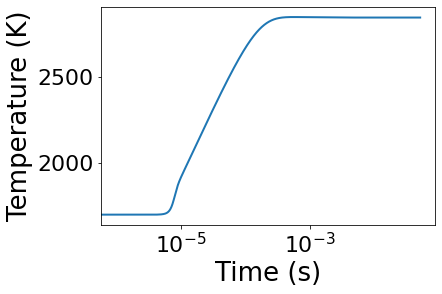

In [10]:
plt.plot(time, temperature)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

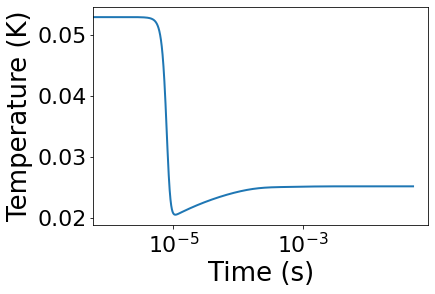

In [11]:
plt.plot(time, Y[:, gas.species_index('H2')])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

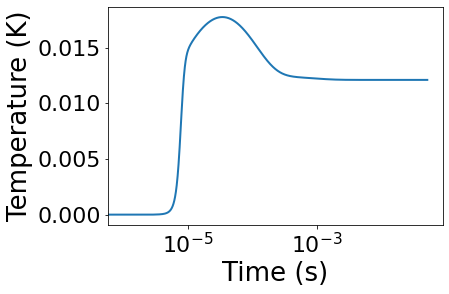

In [12]:
plt.plot(time, Y[:, gas.species_index('OH')])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

In [13]:
temperature[-1]

2845.4132178256946

In [14]:
Y[-1, gas.species_index('H2')]

0.025207938007923803

In [15]:
EndSpecies = [gas.species_names[i] for i in range(gas.n_species) if (Y[900,i]*100 > .01)]

In [16]:
EndSpecies

['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'N2']

In [17]:
Data    = []

Data.append(np.array([[0.7135284280936453, 1.1046153846153843],
        [0.670018750350959, 1000]]))

Data.append(np.array([[0.7136343366778147, 1.1062653288740245],
        [0.3554059037181068, 513.0325584896998]]))
        
Data.append(np.array([[0.7137402452619842, 1.1078985507246375],
        [0.18852212170408722, 290.9163405623883]]))

Data.append(np.array([[0.7153400222965441, 1.1018283166109253],
         [0.13059965479060548, 176.35054720471388]]))

Data.append(np.array([[0.7153901895206244, 1.1095373467112597],
          [0.09671798642975463, 159.55064004448292]]))

In [18]:
a = []
b = []
for i, DataP in enumerate(Data):
    a.append( (DataP[1,1] - DataP[1,0])/(DataP[0,1] - DataP[0,0]) )
    b.append( DataP[1,0] - a[i]*DataP[0,0] )

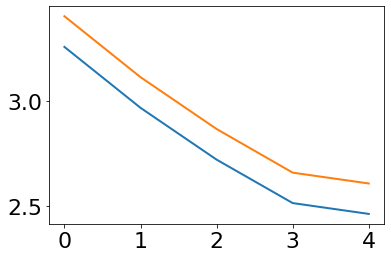

In [19]:
plt.plot(np.log10(np.abs(b)))
plt.plot(np.log10(a))

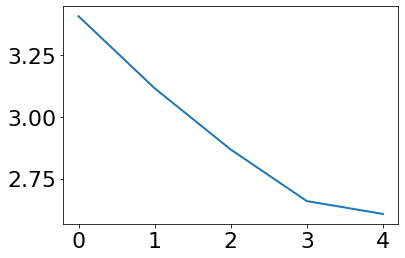

In [20]:
plt.plot(np.log10(a))